
# Life Expectancy Prediction

Created By : Vignesh Krishnan


1. Import and Load the Data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import xgboost as xgb
from scipy.stats import boxcox
from pandas.plotting import scatter_matrix
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,root_mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve,auc,precision_recall_curve
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression

sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8766 entries, 0 to 8765
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    8766 non-null   int64  
 1   V1      8766 non-null   float64
 2   V2      8766 non-null   float64
 3   V3      8766 non-null   float64
 4   V4      8766 non-null   float64
 5   V5      8766 non-null   float64
 6   V6      8766 non-null   float64
 7   V7      8766 non-null   float64
 8   V8      8766 non-null   float64
 9   V9      8766 non-null   float64
 10  V10     8766 non-null   float64
 11  V11     8766 non-null   float64
 12  V12     8766 non-null   float64
 13  V13     8766 non-null   float64
 14  V14     8766 non-null   float64
 15  V15     8766 non-null   float64
 16  V16     8766 non-null   float64
 17  V17     8766 non-null   float64
 18  V18     8766 non-null   float64
 19  V19     8766 non-null   float64
 20  V20     8766 non-null   float64
 21  V21     8766 non-null   float64
 22  

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,...,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8765.000000,8765.000000
mean,4894.080424,-0.262707,0.276243,0.903769,0.217214,-0.034510,0.128270,-0.046677,-0.072294,0.728188,...,-0.055446,-0.158052,-0.037962,0.025195,0.089314,0.074311,0.011304,0.002271,63.788774,0.003423
std,3659.865012,1.521932,1.316532,1.101483,1.436364,1.205127,1.326243,1.083787,1.289670,1.159165,...,0.928883,0.641624,0.490750,0.597736,0.429696,0.548979,0.407724,0.275457,189.989538,0.058407
min,0.000000,-27.670569,-34.607649,-12.389545,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.272790,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.000000
25%,1711.500000,-1.028743,-0.217634,0.398443,-0.660507,-0.640217,-0.652708,-0.522498,-0.198339,-0.020013,...,-0.268549,-0.556611,-0.180358,-0.338479,-0.158342,-0.341189,-0.080466,-0.016702,5.000000,0.000000
50%,3765.000000,-0.394821,0.306407,0.936989,0.206569,-0.131425,-0.170421,-0.021202,0.006406,0.697720,...,-0.126627,-0.149331,-0.049011,0.085047,0.123624,0.025788,-0.000373,0.017039,15.950000,0.000000
75%,7991.000000,1.144834,0.914845,1.593165,1.106434,0.384167,0.504494,0.503021,0.280994,1.436676,...,0.038298,0.245290,0.081211,0.419062,0.360417,0.400858,0.132495,0.078694,52.500000,0.000000
max,11932.000000,1.960497,8.261750,4.101716,10.463020,34.099309,21.393069,34.303177,3.877662,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [5]:
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
# Separate numerical and categorical features
num_features = df.select_dtypes(include=['int64', 'float64'])
cat_features = df.select_dtypes(include=['object'])
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
#num_features.head()

In [8]:
num_features

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,11926,0.224210,0.730182,0.536568,-0.297833,0.529837,0.008517,-0.153646,-0.778260,1.143360,...,0.311157,-1.489044,-0.207238,-0.991151,0.504758,0.005972,0.092759,0.213102,1.99,0.0
8762,11928,-0.777982,1.247878,1.106014,1.421211,-0.087339,0.044765,0.039896,0.547840,0.752861,...,-0.144915,-0.084414,-0.150048,-0.063168,-0.039265,-0.283939,0.250660,0.110168,12.99,0.0
8763,11930,1.297487,-0.202241,0.043946,0.094497,-0.057158,0.099204,-0.280711,-0.127515,2.168290,...,-0.338119,-0.551489,-0.248950,-0.964184,0.592470,1.156197,-0.102371,-0.014854,39.98,0.0
8764,11932,-1.093189,0.157400,2.048652,-0.860421,0.235073,-0.167494,0.636240,-0.205278,1.507648,...,-0.255789,-0.233994,-0.451409,0.018927,0.377757,0.958870,-0.297683,-0.246392,80.50,0.0



# 2. Exploratory Data Analysis (EDA)


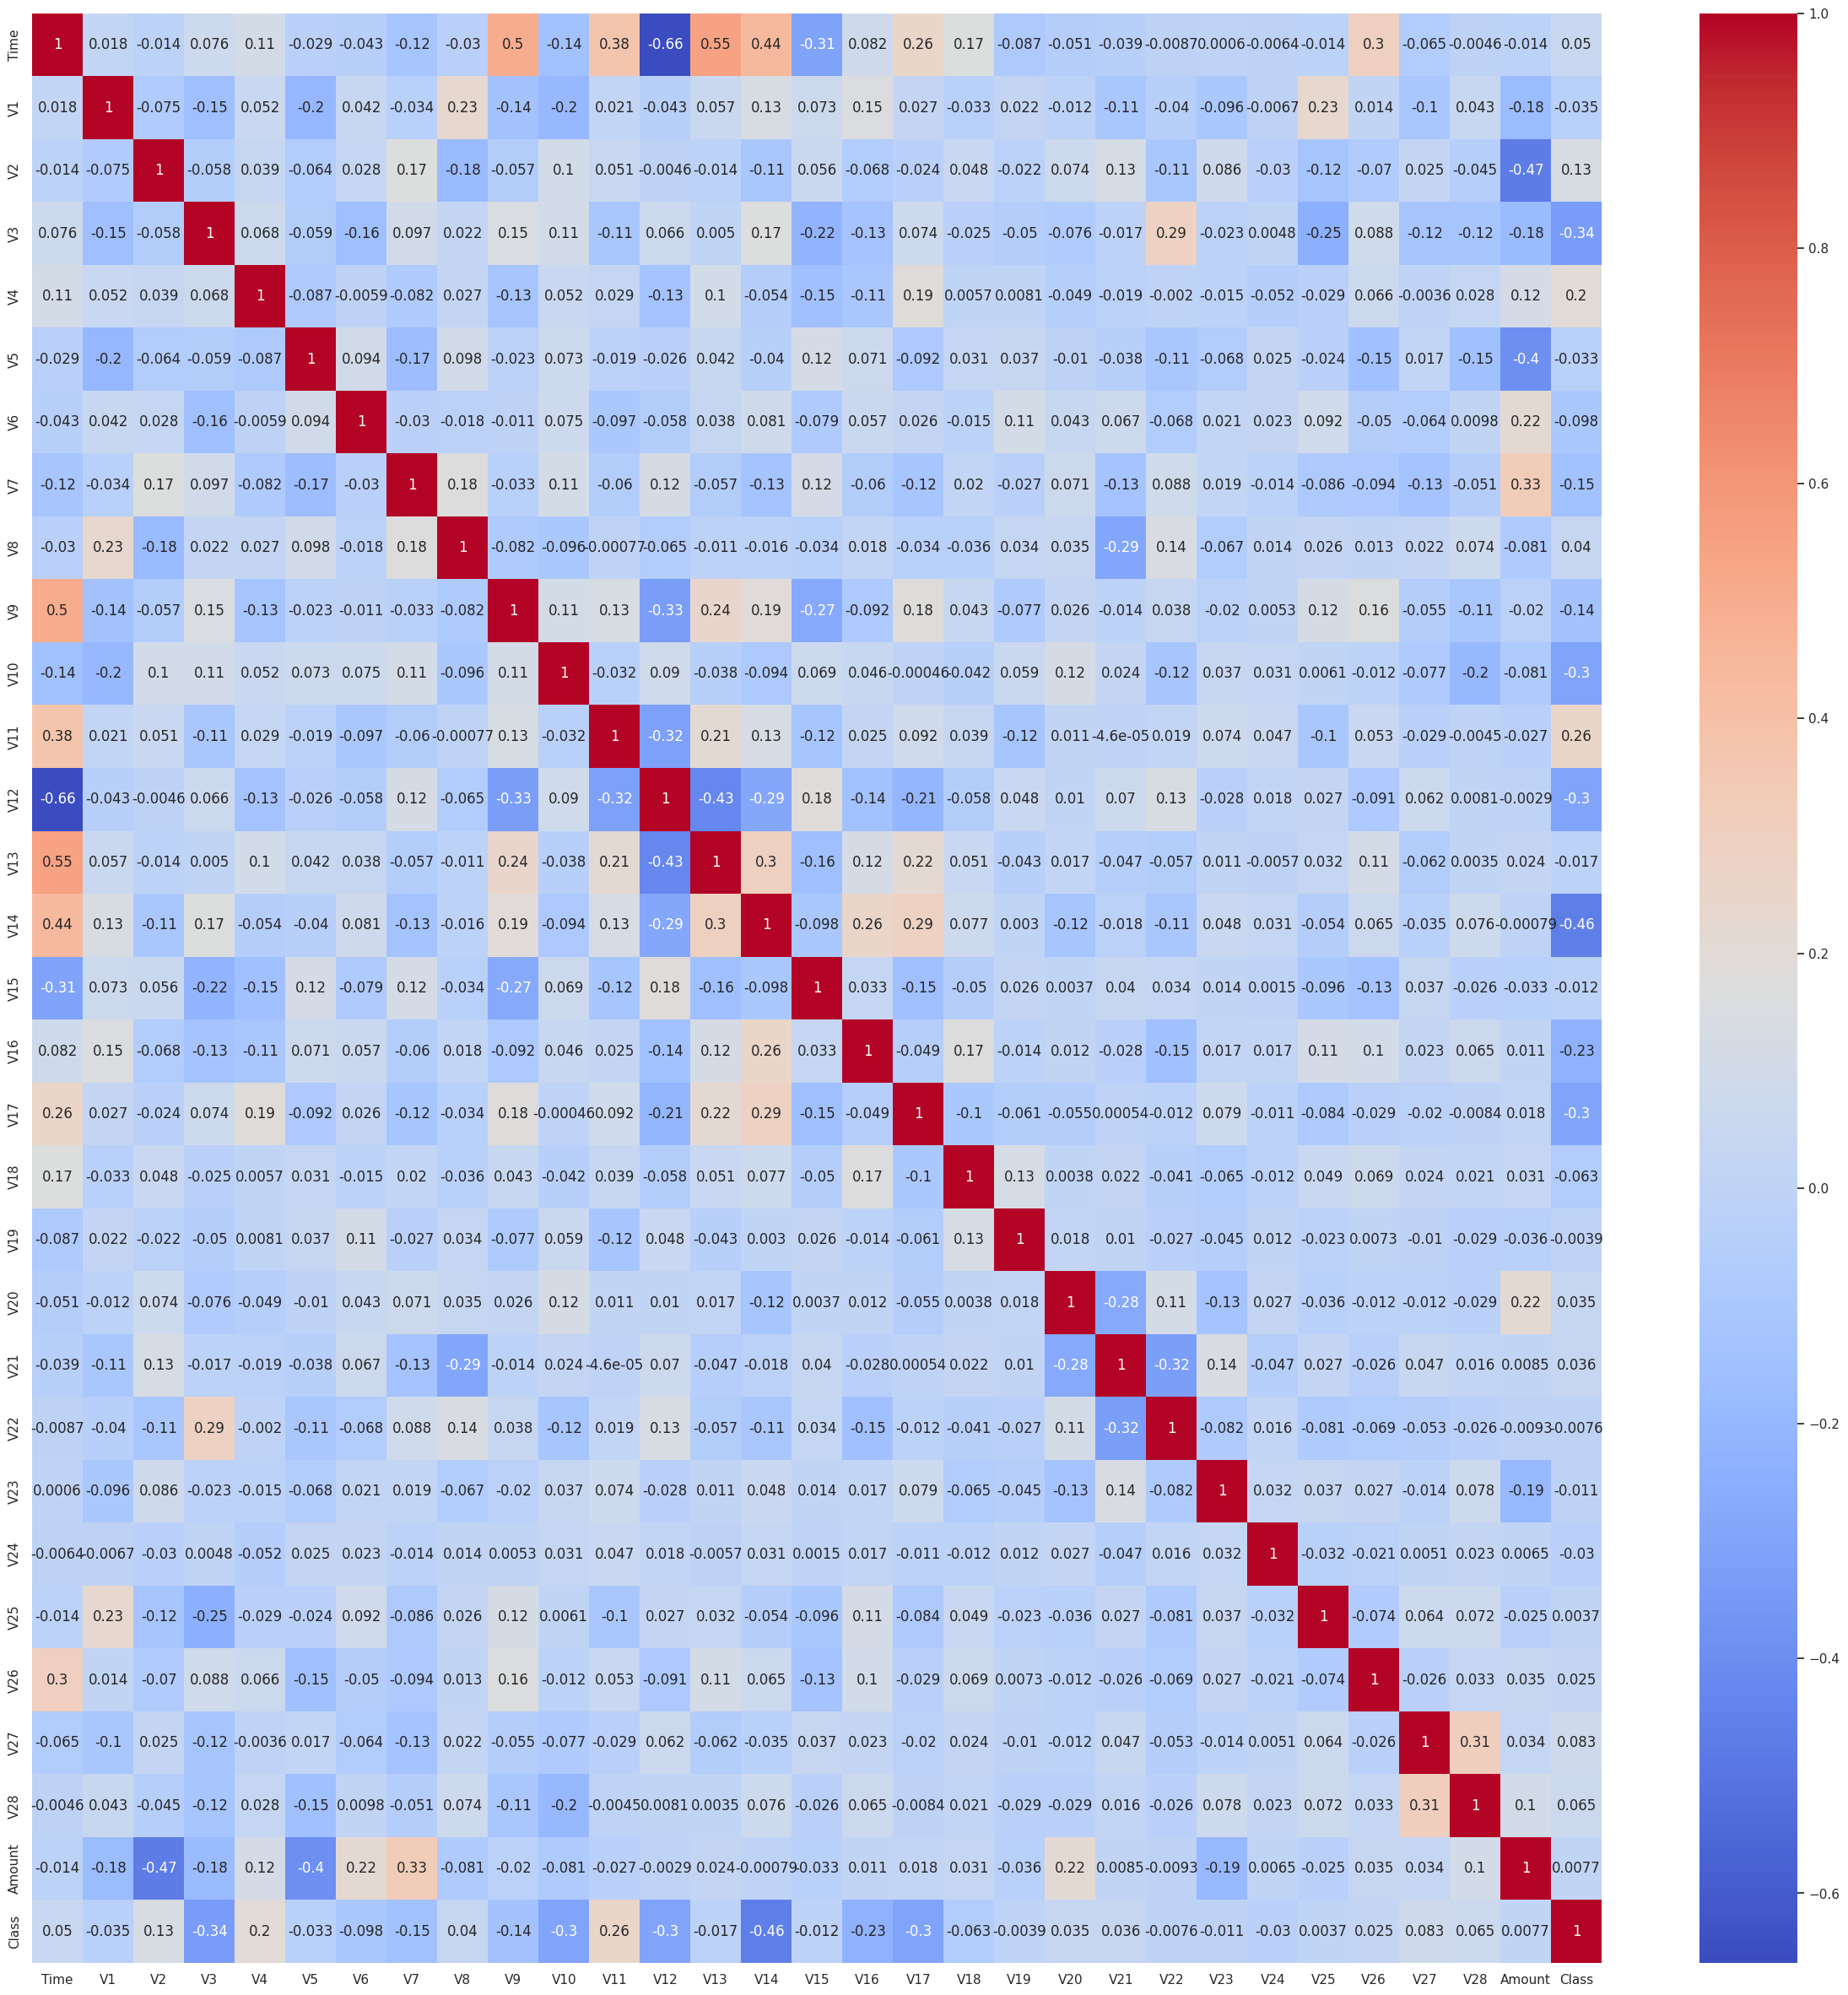

In [9]:
# Correlation of Numerical data
plt.figure(figsize=(30, 30))
sns.heatmap(num_features.corr(), annot = True, cmap = "coolwarm")
plt.show()

<Figure size 640x480 with 0 Axes>

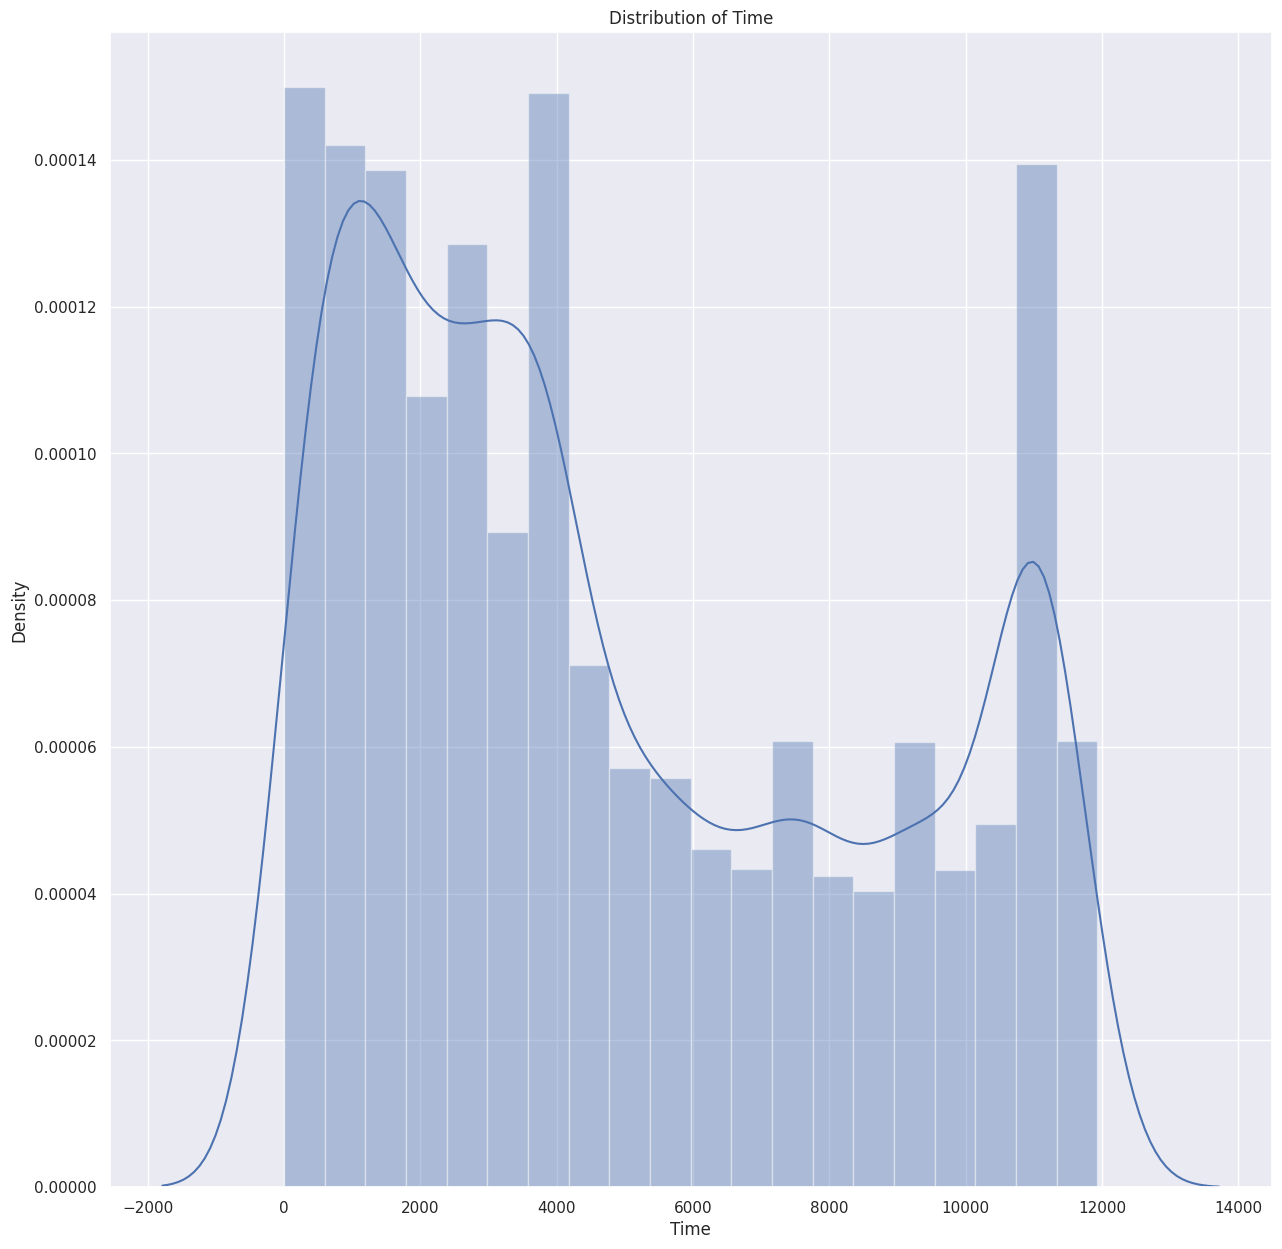

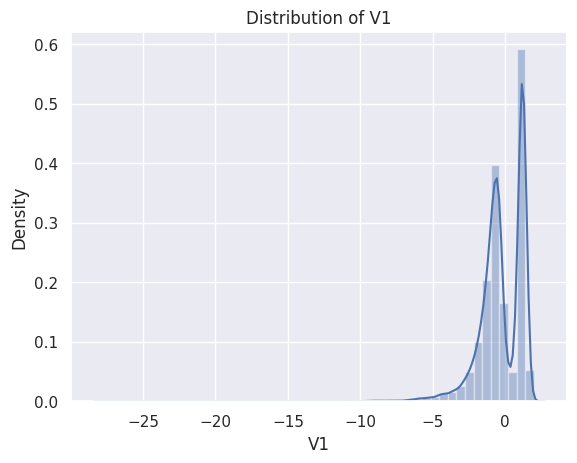

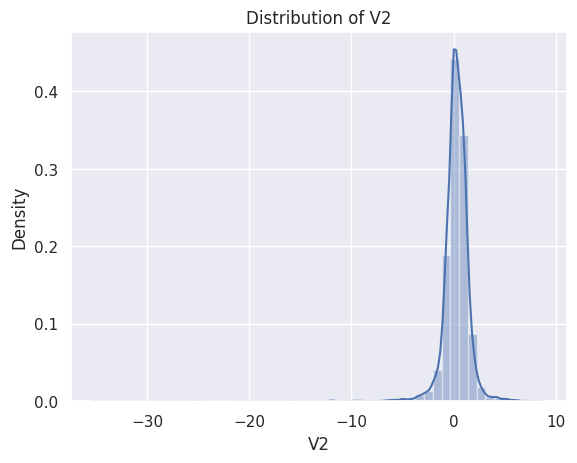

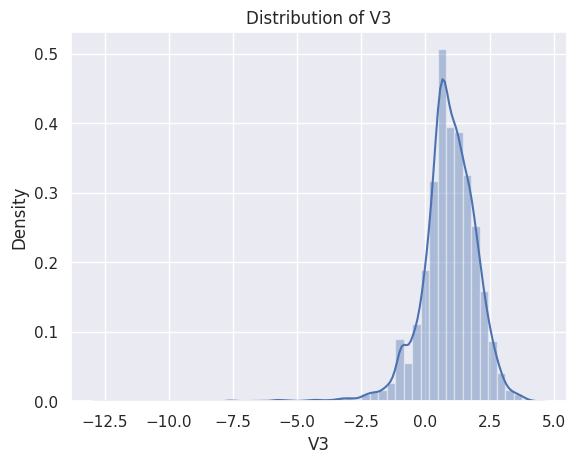

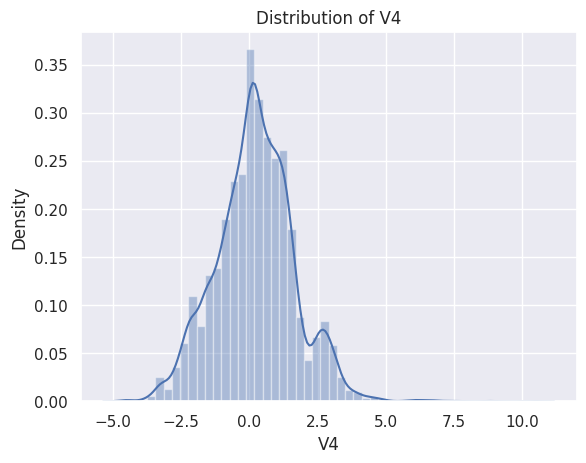

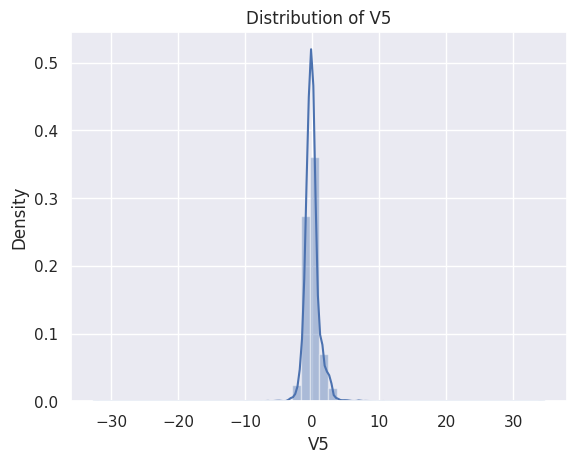

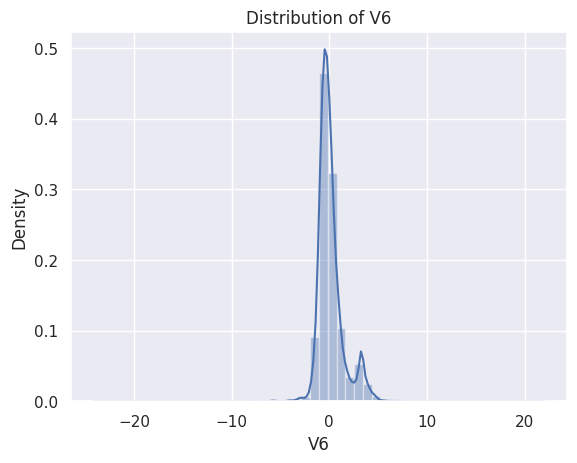

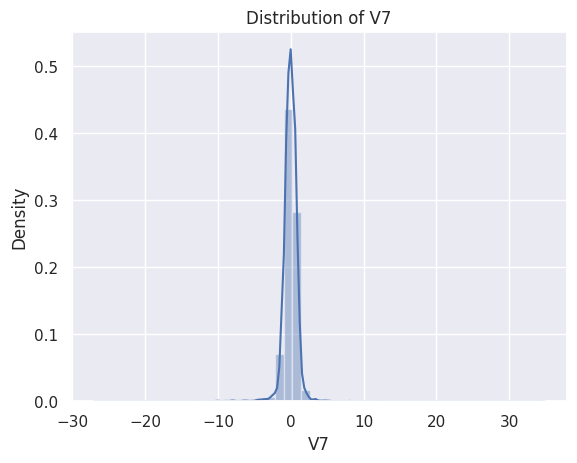

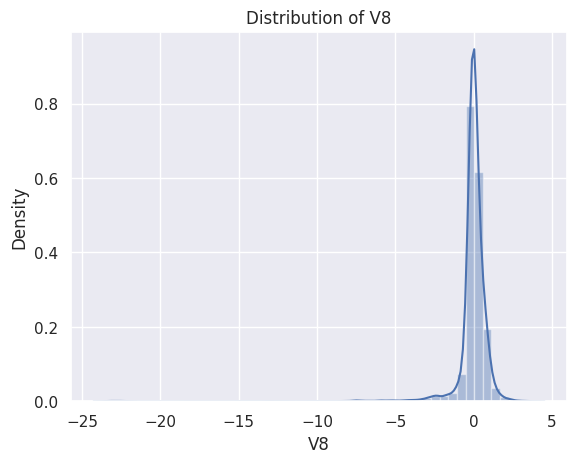

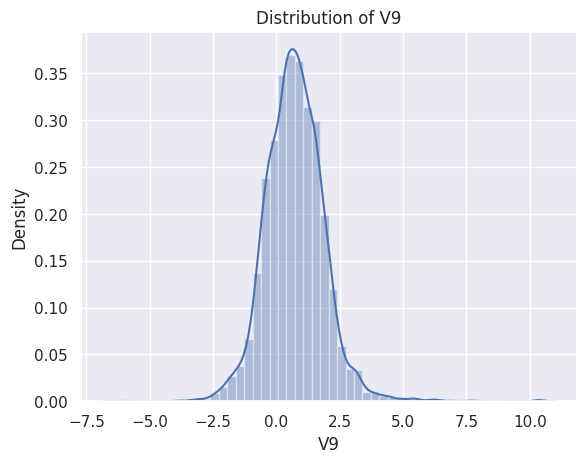

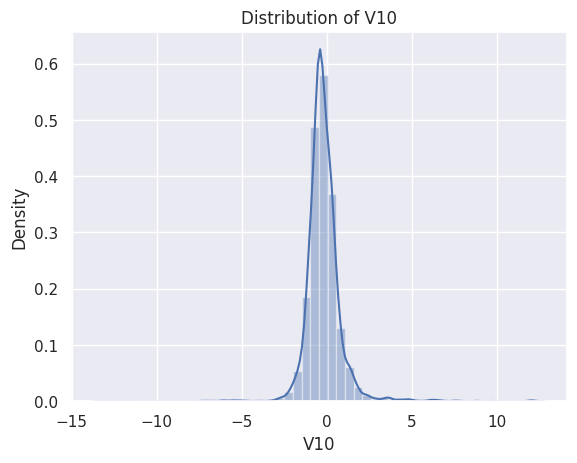

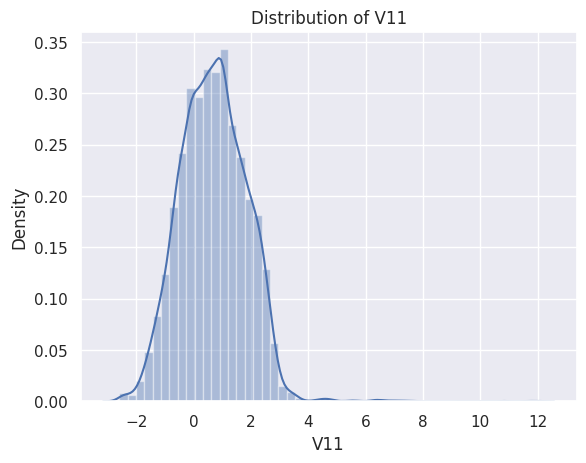

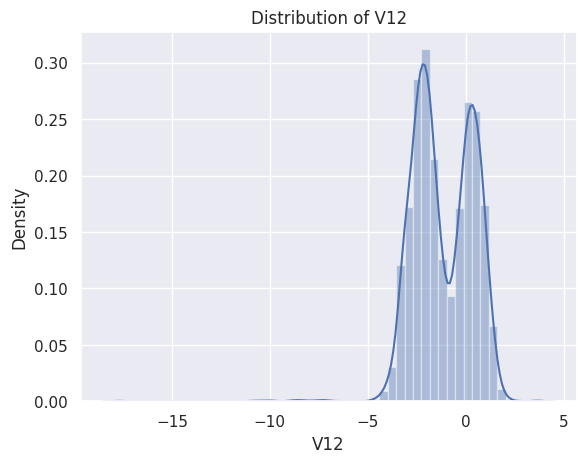

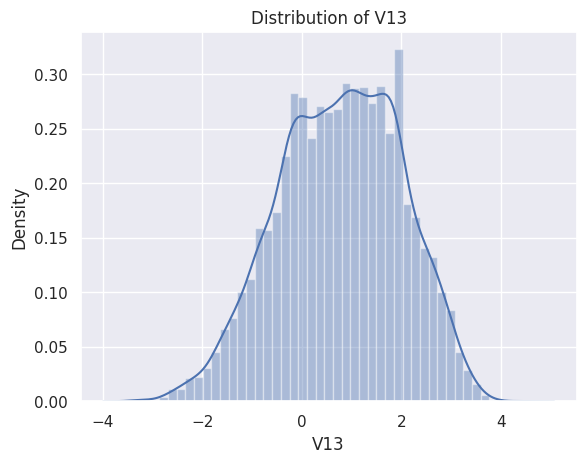

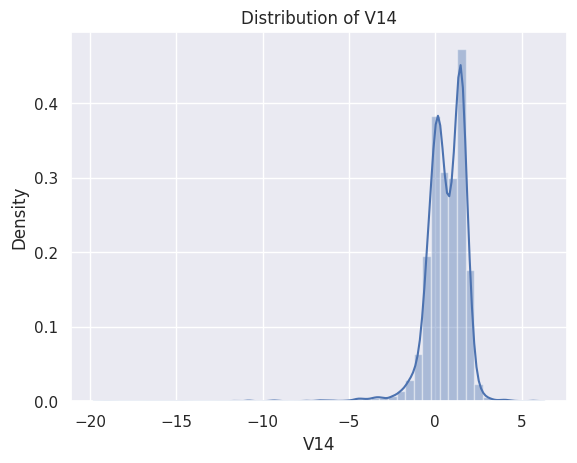

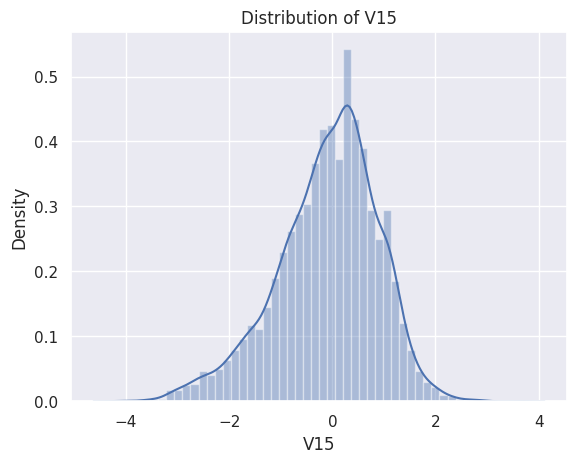

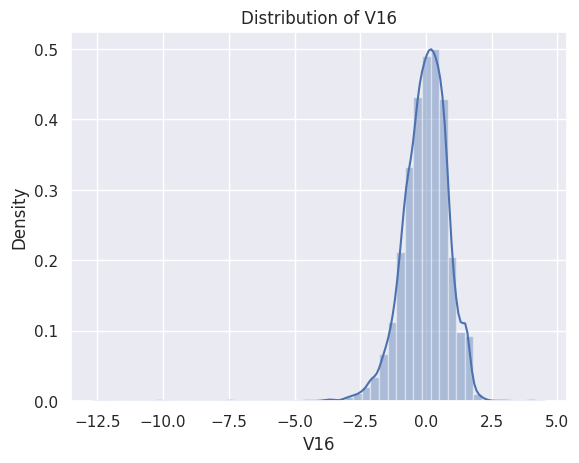

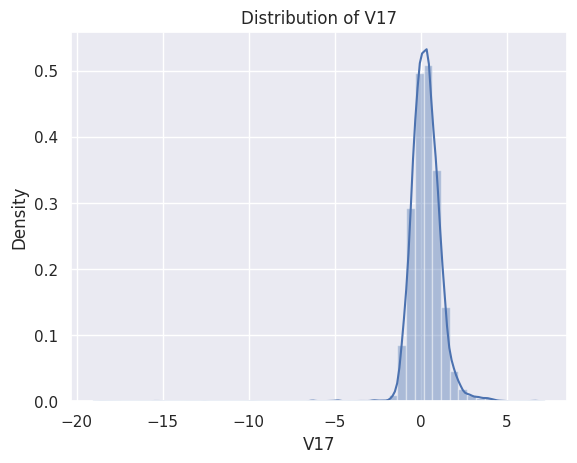

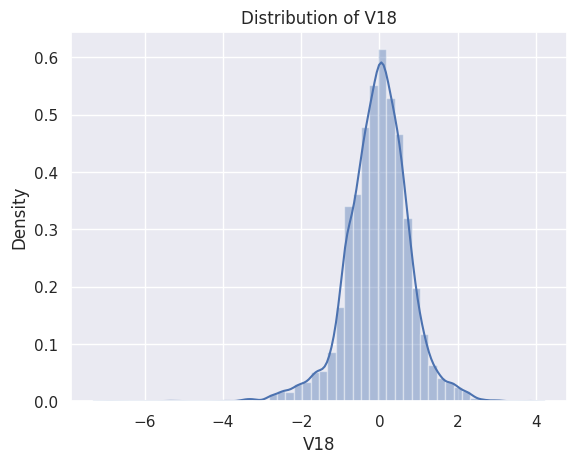

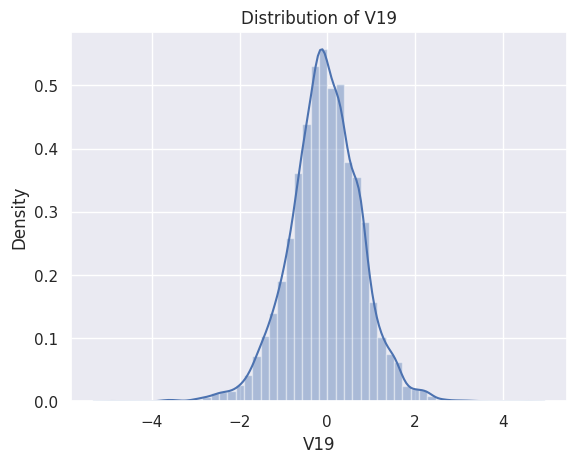

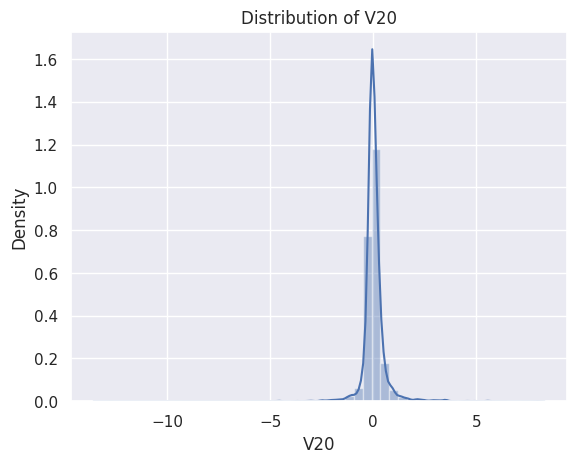

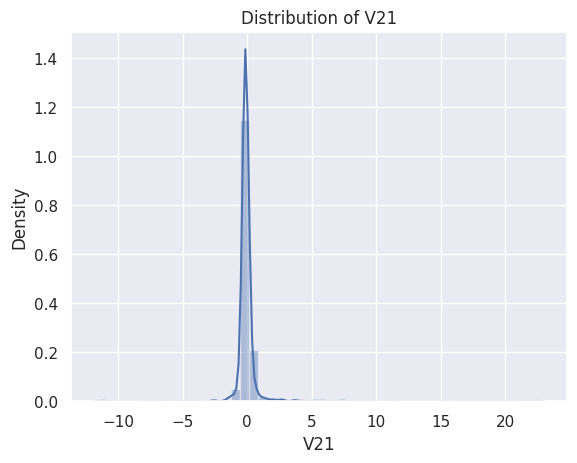

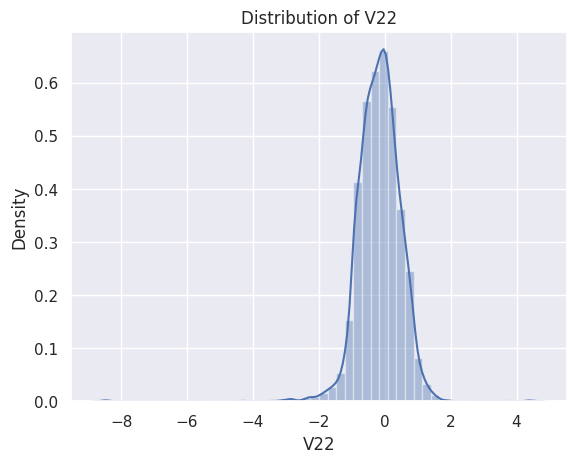

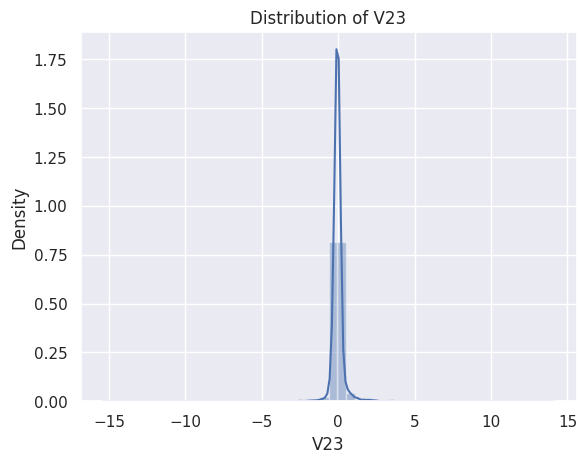

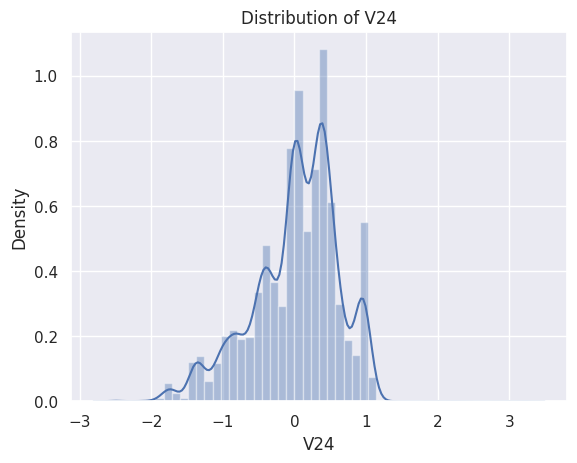

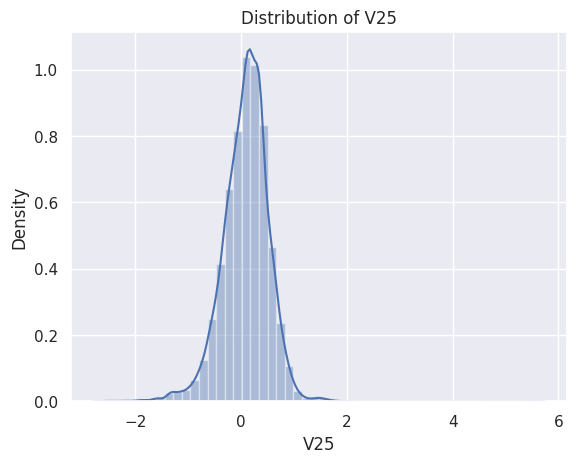

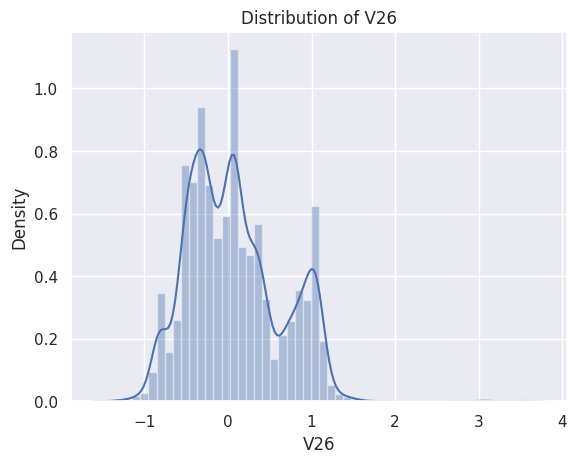

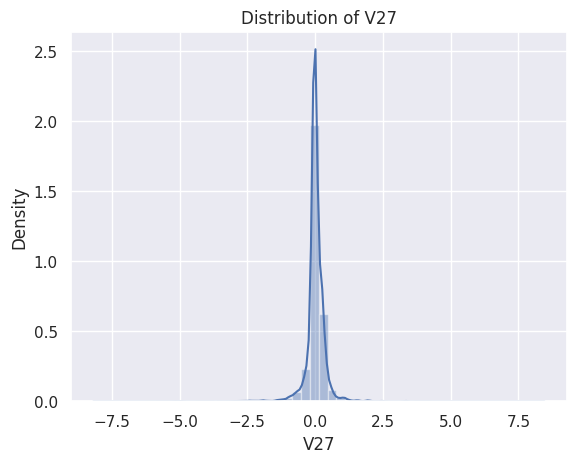

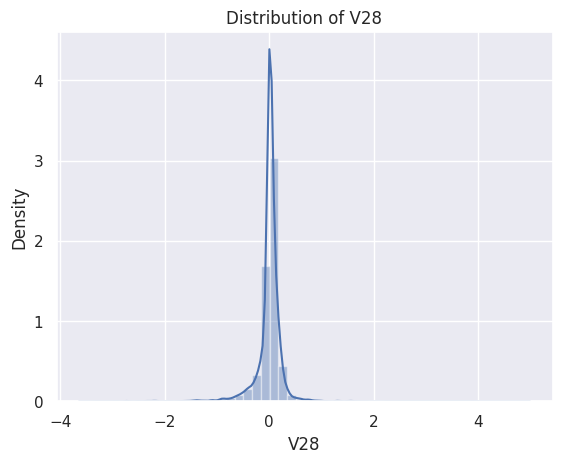

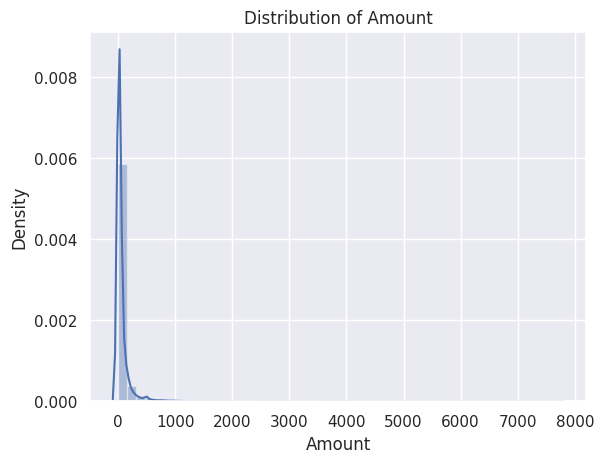

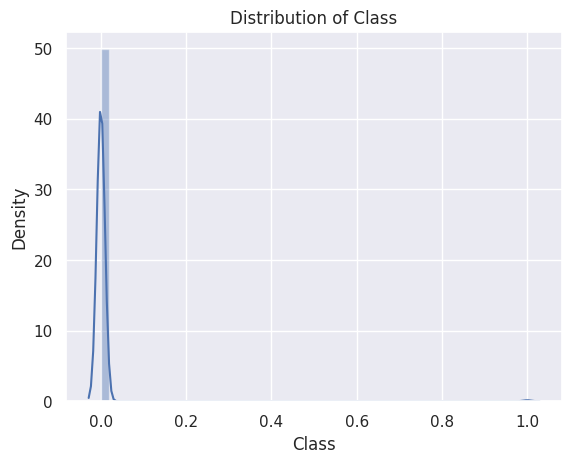

In [10]:
plt.figure()
import matplotlib.pyplot as plt
# Check for variables distributions.
plt.figure(figsize=(15, 15))
for col in num_features.columns:
    sns.distplot(num_features[col])
    plt.title(f'Distribution of {col}')
    plt.show()

# Summarize insights from EDA

Life expectancy and Adult mortality has negative coorelation.

BMI and Life expectancy are postively coorelated

GDP and Life expectancy  has positive coorelation

Schooling and Life expectancy  has positive coorelation

Developed countries has Higher Life expectancy compared to developing countires.

There are some skewness in the most of the data like diphtheria, polio,

**#3. Missing Values & Outlier Treatment**


In [11]:
# Check for missing values
df.isnull().sum()
#No Missing values

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [12]:
# replace NA values with the mean of the respective column
for col in df.columns:
  if df[col].isnull().any():
    mean_val = df[col].mean()
    df[col].fillna(mean_val, inplace=True)

print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [13]:
df['Class'] = df['Class'].round().astype(int)

In [14]:
df['Class'].unique()

array([0, 1])

# Detecting outliers using IQR


In [15]:
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return {
        'column': data.name,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': outliers.count(),
        'Outliers': outliers
    }

outlier_results = []


for col in num_features:
    result = find_outliers(df[col])
    outlier_results.append(result)

# Print results
for res in outlier_results:
    print(f"\n Column: {res['column']}")
    print(f"Q1 = {res['Q1']}, Q3 = {res['Q3']}, IQR = {res['IQR']}")
    print(f"Lower Bound = {res['Lower Bound']}, Upper Bound = {res['Upper Bound']}")
    print(f"Outlier Count: {res['Outlier Count']}")
    if res['Outlier Count'] > 0:
        print(f"Outliers: {len(res['Outliers'])}")
    else:
        print("No outliers detected.")


 Column: Time
Q1 = 1711.5, Q3 = 7991.0, IQR = 6279.5
Lower Bound = -7707.75, Upper Bound = 17410.25
Outlier Count: 0
No outliers detected.

 Column: V1
Q1 = -1.0287433225, Q3 = 1.144833682, IQR = 2.1735770045000002
Lower Bound = -4.289108829250001, Upper Bound = 4.40519918875
Outlier Count: 156
Outliers: 156

 Column: V2
Q1 = -0.2176337645, Q3 = 0.91484477125, IQR = 1.13247853575
Lower Bound = -1.916351568125, Upper Bound = 2.613562574875
Outlier Count: 442
Outliers: 442

 Column: V3
Q1 = 0.39844311574999997, Q3 = 1.59316532825, IQR = 1.1947222125
Lower Bound = -1.3936402030000001, Upper Bound = 3.385248647
Outlier Count: 256
Outliers: 256

 Column: V4
Q1 = -0.6605065305, Q3 = 1.1064341362499999, IQR = 1.7669406667499998
Lower Bound = -3.310917530625, Upper Bound = 3.7568451363749995
Outlier Count: 111
Outliers: 111

 Column: V5
Q1 = -0.64021738, Q3 = 0.38416652725, IQR = 1.0243839072499998
Lower Bound = -2.176793240875, Upper Bound = 1.9207423881249999
Outlier Count: 563
Outliers: 56

In [16]:
def find_outliers(data):
    Q1 = data.quantile(0.02)
    Q3 = data.quantile(0.98)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return {
        'column': data.name,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': outliers.count(),
        'Outliers': outliers
    }

outlier_results = []
for col in num_features:
    if(col!= 'Class'):
      result = find_outliers(df[col])
      outlier_results.append(result)

# Print results
for res in outlier_results:
    print(f"\n Column: {res['column']}")
    if res['Outlier Count'] > 0:
        print(f"Outliers: {len(res['Outliers'])}")
        df[col] = np.where(df[col]> res['Upper Bound'], res['Upper Bound'],
                                    np.where(df[col] < res['Lower Bound'] ,
                                            res['Lower Bound'],  df[col]))
    else:
        print("No outliers detected.")


 Column: Time
No outliers detected.

 Column: V1
Outliers: 2

 Column: V2
Outliers: 10

 Column: V3
Outliers: 4

 Column: V4
No outliers detected.

 Column: V5
Outliers: 7

 Column: V6
Outliers: 2

 Column: V7
Outliers: 25

 Column: V8
Outliers: 31

 Column: V9
Outliers: 3

 Column: V10
Outliers: 15

 Column: V11
Outliers: 3

 Column: V12
Outliers: 3

 Column: V13
No outliers detected.

 Column: V14
Outliers: 15

 Column: V15
No outliers detected.

 Column: V16
Outliers: 5

 Column: V17
Outliers: 8

 Column: V18
No outliers detected.

 Column: V19
No outliers detected.

 Column: V20
Outliers: 22

 Column: V21
Outliers: 59

 Column: V22
Outliers: 5

 Column: V23
Outliers: 26

 Column: V24
No outliers detected.

 Column: V25
Outliers: 1

 Column: V26
No outliers detected.

 Column: V27
Outliers: 22

 Column: V28
Outliers: 27

 Column: Amount
Outliers: 32


#Train and test data split

In [17]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [18]:
y = df['Class']
X = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]

In [19]:
from sklearn.model_selection import train_test_split
X_train_before, X_test, y_train_before, y_test = train_test_split(X, y, train_size = 0.7, random_state = 82)
X_train_before.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
2944,2493,0.558720,-1.359603,0.824984,0.419281,-1.060281,0.995057,-0.586436,0.447257,0.918206,...,0.373489,0.030474,-0.254943,-0.100331,-0.218016,-0.154452,0.925966,-0.056069,0.043501,275.38
6463,7705,-0.804271,0.180587,2.728086,-1.790850,-0.483597,0.057280,0.250570,0.097549,2.485919,...,-0.109916,-0.046078,0.303240,-0.249429,0.140408,0.305821,-0.825483,-0.087676,-0.164005,42.00
5103,4766,-1.384033,1.242076,1.279509,1.228174,0.507185,-0.071279,0.624163,-0.331724,1.823715,...,0.147858,-0.296998,0.099256,-0.216195,0.046946,-0.202086,-0.393830,0.082224,0.230194,27.34
2288,1831,1.171520,-1.437090,1.086588,-0.136846,-1.743995,0.651399,-1.382469,0.307991,0.948622,...,-0.396192,-0.620039,-1.085185,-0.065901,-0.426426,0.174459,1.078496,-0.003531,0.023441,91.80
1774,1373,-1.867566,-1.516825,1.832457,-1.256814,-0.660334,0.389046,-1.237955,1.026461,-0.372089,...,0.328733,0.503359,0.925008,-0.110398,-0.270428,0.270808,-0.126041,-0.017169,-0.147996,104.48


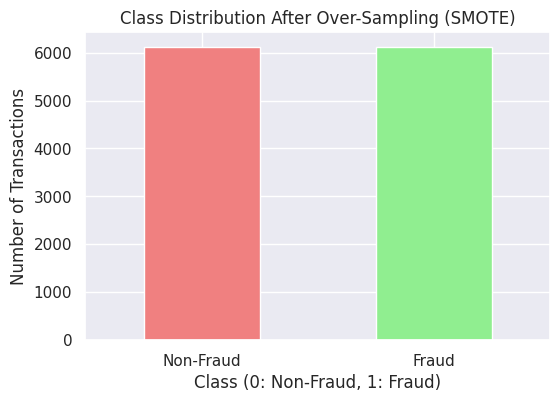

In [20]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE over-sampling technique
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train_before, y_train_before)

# Plot class distribution after over-sampling
plt.figure(figsize=(6, 4))
y_train.value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Class Distribution After Over-Sampling (SMOTE)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], rotation=0)
plt.show()

In [21]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,2493,0.558720,-1.359603,0.824984,0.419281,-1.060281,0.995057,-0.586436,0.447257,0.918206,...,0.373489,0.030474,-0.254943,-0.100331,-0.218016,-0.154452,0.925966,-0.056069,0.043501,275.38
1,7705,-0.804271,0.180587,2.728086,-1.790850,-0.483597,0.057280,0.250570,0.097549,2.485919,...,-0.109916,-0.046078,0.303240,-0.249429,0.140408,0.305821,-0.825483,-0.087676,-0.164005,42.00
2,4766,-1.384033,1.242076,1.279509,1.228174,0.507185,-0.071279,0.624163,-0.331724,1.823715,...,0.147858,-0.296998,0.099256,-0.216195,0.046946,-0.202086,-0.393830,0.082224,0.230194,27.34
3,1831,1.171520,-1.437090,1.086588,-0.136846,-1.743995,0.651399,-1.382469,0.307991,0.948622,...,-0.396192,-0.620039,-1.085185,-0.065901,-0.426426,0.174459,1.078496,-0.003531,0.023441,91.80
4,1373,-1.867566,-1.516825,1.832457,-1.256814,-0.660334,0.389046,-1.237955,1.026461,-0.372089,...,0.328733,0.503359,0.925008,-0.110398,-0.270428,0.270808,-0.126041,-0.017169,-0.147996,104.48


In [22]:
X_train.dtypes

,0
Time,int64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


#Feature Engineering & Preprocessing

In [23]:
# Log Transformation for outlier removal in BMI coloumn
#X_train_num['SQUARE_FT'] = np.log(X_train_num['SQUARE_FT'] + 1)


In [24]:
from sklearn.preprocessing import StandardScaler
StandardScaler_object = StandardScaler()

In [25]:
# Standardize 'Amount' and 'Time' features (V1-V28 are already scaled/centered)
scaler = StandardScaler()
X_train[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

In [26]:
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
print("Training Score: ",logit_model.score(X_train,y_train))
print("Training Score: ",logit_model.score(X_test,y_test))

Training Score:  1.0
Training Score:  0.9980988593155894


Transformation and scaling of test data

# Functions to compute the scoring

SVN

In [27]:
results = []

In [28]:
#svc_model = SVC(probability=True)
#svc_model.fit(X_train,y_train)
#print("Training Score: ",svc_model.score(X_train,y_train))
#print("Testing Score: ",svc_model.score(X_test,y_test))

#Decission tree

In [29]:
dtc_model = DecisionTreeClassifier(random_state=100)
dtc_model.fit(X_train,y_train)
print("Training Score: ",dtc_model.score(X_train,y_train))
print("Testing Score: ",dtc_model.score(X_test,y_test))


Training Score:  1.0
Testing Score:  0.9977186311787072


#Random Forest

In [30]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,y_train)
print("Training Score :",rfc_model.score(X_train,y_train))
print("Testing Score :",rfc_model.score(X_test,y_test))


Training Score : 1.0
Testing Score : 0.9988593155893536


#KNN REGRESSOR

In [31]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)
print("Training Score: ",knn_model.score(X_train,y_train))
print("Training Score: ",knn_model.score(X_test,y_test))


Training Score:  0.9999182873018467
Training Score:  0.9984790874524715


# XGBoost Regression model

In [32]:
# XGBoost Regression model - Max depth = 2
xgb_raw = xgb.XGBRegressor(random_state = 111, max_depth = 2)
xgb_raw.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

# Gradient Boosting Regression model

In [33]:
# Gradient Boosting Regression model
gb_raw = GradientBoostingRegressor(n_estimators = 100, max_depth = 3, random_state = 123)
gb_raw.fit(X_train, y_train)


GradientBoostingRegressor(random_state=123)

#AdaBoostRegressor

In [34]:

# AdaBoost Regressor
ada_raw = AdaBoostRegressor()

ada_raw.fit(X_train, y_train)


AdaBoostRegressor()

In [35]:
y_test.unique()

array([0., 1.])

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return precision, recall, f1

# Evaluate each model
logreg_metrics = evaluate_model(logit_model, X_test, y_test)
dtree_metrics = evaluate_model(dtc_model, X_test, y_test)
rf_metrics = evaluate_model(rfc_model, X_test, y_test)
#xgb_metrics = evaluate_model(xgb_raw, X_test, y_test)
knn_metrics = evaluate_model(knn_model, X_test, y_test)
gb_metrics = evaluate_model(gb_raw, X_test, y_test)
ada_metrics = evaluate_model(ada_raw, X_test, y_test)

# Display metrics
logreg_metrics, dtree_metrics, rf_metrics, knn_metrics, gb_metrics, ada_metrics

((0.8333333333333334, 0.7692307692307693, 0.8),
 (0.7692307692307693, 0.7692307692307693, 0.7692307692307693),
 (1.0, 0.7692307692307693, 0.8695652173913043),
 (0.8461538461538461, 0.8461538461538461, 0.8461538461538461),
 (0.7142857142857143, 0.7692307692307693, 0.7407407407407407),
 (1.0, 0.7692307692307693, 0.8695652173913043))

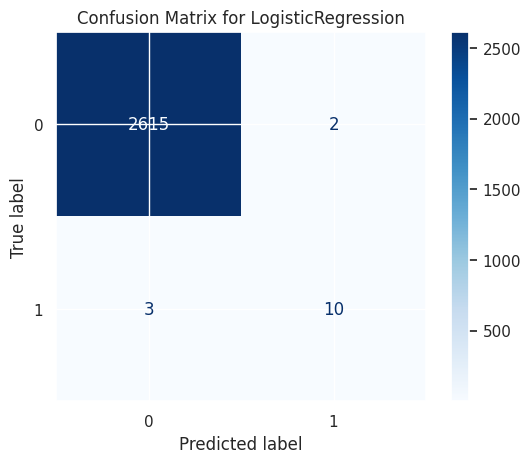

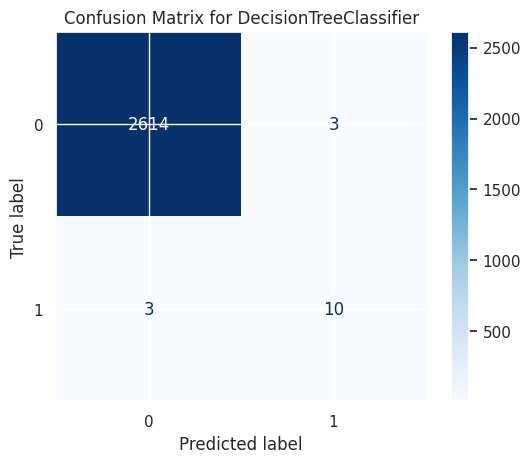

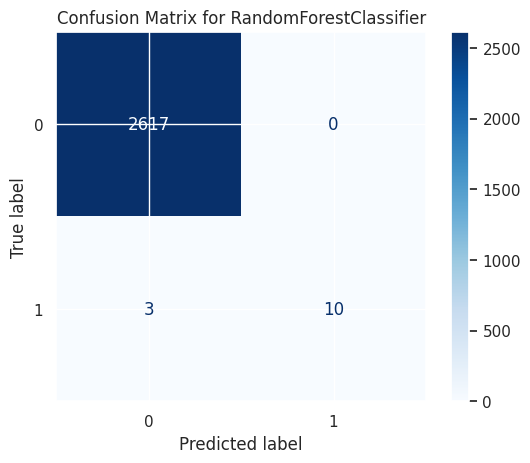

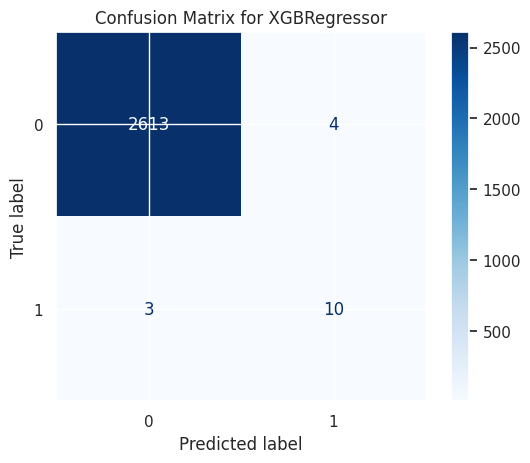

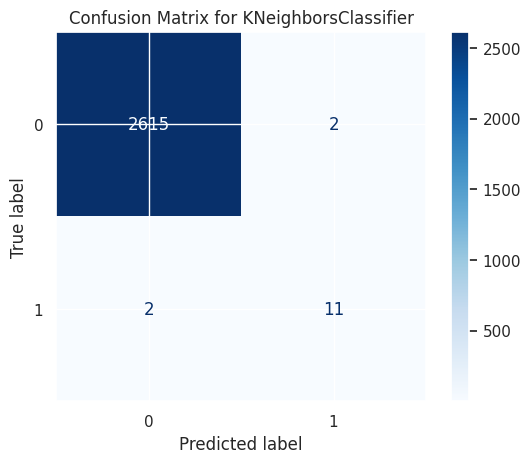

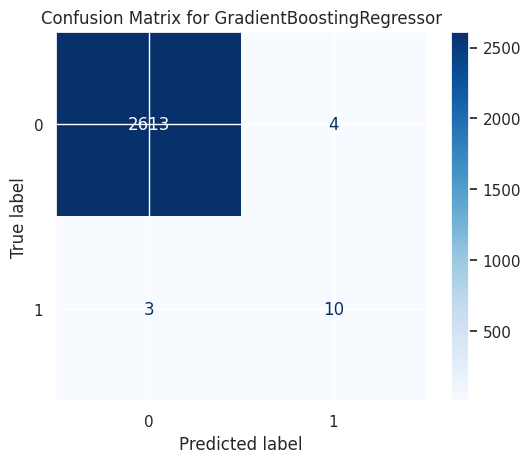

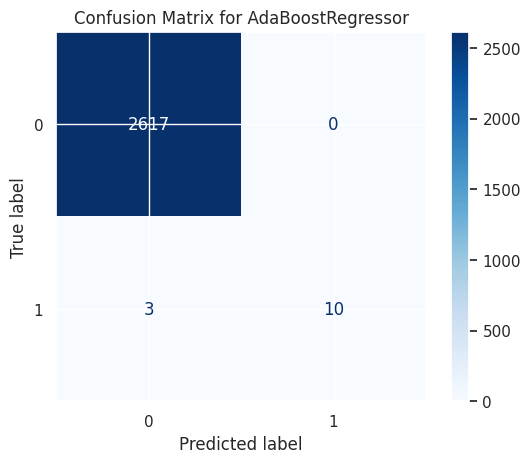

In [37]:
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test):
    from sklearn.metrics import ConfusionMatrixDisplay
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(logit_model, X_test, y_test)
plot_confusion_matrix(dtc_model, X_test, y_test)
plot_confusion_matrix(rfc_model, X_test, y_test)
plot_confusion_matrix(xgb_raw, X_test, y_test)
plot_confusion_matrix(knn_model, X_test, y_test)
plot_confusion_matrix(gb_raw, X_test, y_test)
plot_confusion_matrix(ada_raw, X_test, y_test)

Hyperparameter Tuning for random forest

•	Compare performance on both datasets (Training and testing) to detect overfitting

In [38]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [39]:

ann_model=keras.Sequential()
ann_model.add(Dense(8,input_dim=(X_train.shape[1]),activation='relu'))
ann_model.add(Dense(1,activation='sigmoid'))
ann_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=ann_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9271 - loss: 0.2054 - val_accuracy: 0.9981 - val_loss: 0.0560
Epoch 2/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0187 - val_accuracy: 0.9981 - val_loss: 0.0161
Epoch 3/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 0.9981 - val_loss: 0.0100
Epoch 4/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9999 - loss: 0.0023 - val_accuracy: 0.9981 - val_loss: 0.0085
Epoch 5/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9999 - loss: 0.0014 - val_accuracy: 0.9981 - val_loss: 0.0081
Epoch 6/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9999 - loss: 9.6214e-04 - val_accuracy: 0.9981 - val_loss: 0.0079
Epoch 7/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9999 - loss: 7.3906e-04 - val_accuracy: 0.9981 - val_loss: 0.0079
Epoch 8/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 4.9097e-04 - val_

In [40]:
ann_model.evaluate(X_test, y_test)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9977 - loss: 0.0365


[0.024369101971387863, 0.9980988502502441]

In [41]:
y_pred = ann_model.predict(X_test)

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [42]:
a1=history.history
p=pd.DataFrame(a1)

In [43]:
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [44]:
callback=EarlyStopping(monitor='val_accuracy',min_delta=0.00001,patience=20,verbose=1,mode='auto', restore_best_weights=True)

In [45]:
ann_model1=model=keras.Sequential()
ann_model1.add(Dense(50,input_dim=(X_train.shape[1]),activation='relu'))
ann_model1.add(Dense(100,activation='relu'))
ann_model1.add(Dense(100,activation='relu'))
ann_model1.add(Dropout(0.2))
ann_model1.add(Dense(1,activation='sigmoid'))
ann_model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
his1 = ann_model1.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=40,
    callbacks=callback
)



Epoch 1/40
383/383 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9727 - loss: 0.0730 - val_accuracy: 0.9981 - val_loss: 0.0121
Epoch 2/40
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 7.5803e-05 - val_accuracy: 0.9981 - val_loss: 0.0144
Epoch 3/40
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.6384e-05 - val_accuracy: 0.9981 - val_loss: 0.0151
Epoch 4/40
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 9.6787e-06 - val_accuracy: 0.9981 - val_loss: 0.0158
Epoch 5/40
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 3.9439e-06 - val_accuracy: 0.9981 - val_loss: 0.0169
Epoch 6/40
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 3.6439e-06 - val_accuracy: 0.9981 - val_loss: 0.0173
Epoch 7/40
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.8514e-06 - val_accuracy: 0.9981 - val_loss: 0.0178
Epoch 8/40
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1

#Dropout regularization

In [46]:
a2=his1.history
p1=pd.DataFrame(a2)
a2

{'accuracy': [0.9943618178367615,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.01866394281387329,
  5.794637763756327e-05,
  1.4404502508114092e-05,
  8.327350769832265e-06,
  3.702332833199762e-06,
  2.493080273779924e-06,
  1.609013338566001e-06,
  1.2713649084616918e-06,
  9.252415225091681e-07,
  6.029164865140046e-07,
  5.146062562744191e-07,
  4.233120876051544e-07,
  3.115352740223898e-07,
  1.7785983175144793e-07,
  1.434623015938996e-07,
  1.547309409488662e-07,
  1.0830809316075829e-07,
  1.080172822298664e-07,
  6.174266786729277e-08,
  7.030204329794287e-08,
  4.012522225593784e-08],
 'val_accuracy': [0.9980988502502441,
  0.9980988502502441,
  0.9980988502502441,
  0.9980988502502441,
  0.9980988502502441,
  0.9980988502502441,
  0.9980988502502441,
  0.9980988502502441,
  0.9980988502502441,
  0.9980988502502441,
  0.9980988502502441,
  0.9980988502502441,
  0.99809

In [47]:
print(p1.head())
print(p1.columns)

   accuracy      loss  val_accuracy  val_loss
0  0.994362  0.018664      0.998099  0.012122
1  1.000000  0.000058      0.998099  0.014351
2  1.000000  0.000014      0.998099  0.015066
3  1.000000  0.000008      0.998099  0.015800
4  1.000000  0.000004      0.998099  0.016920
Index(['accuracy', 'loss', 'val_accuracy', 'val_loss'], dtype='object')


In [49]:
p['accuracy'].max(),

(1.0,)

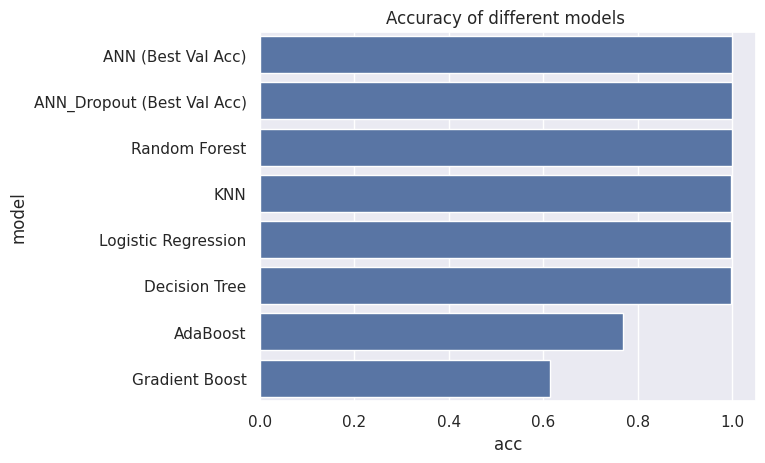

In [51]:
f_df1 = pd.DataFrame({
    'acc': [
        logit_model.score(X_test, y_test),
        dtc_model.score(X_test, y_test),
        rfc_model.score(X_test, y_test),
        knn_model.score(X_test, y_test),
        gb_raw.score(X_test, y_test),
        ada_raw.score(X_test, y_test),
       # ann_model.evaluate(X_test, y_test, verbose=0)[1],       # accuracy
       # ann_dropout.evaluate(X_test, y_test, verbose=0)[1],     # accuracy
        p['accuracy'].max(),
        p1['accuracy'].max()
    ],
    'model': [
        'Logistic Regression',
        'Decision Tree',
        'Random Forest',
        'KNN',
        'Gradient Boost',
        'AdaBoost',
       # 'ANN',
        #'ANN_Dropout',
        'ANN (Best Val Acc)',
        'ANN_Dropout (Best Val Acc)'
    ]
})
f_df1.sort_values('acc',ascending=False,inplace=True)
sns.barplot(data=f_df1, x='acc', y='model')
plt.title('Accuracy of different models ')
plt.show()

#performance Metrics

In [52]:
f_df1

,acc,model
6,1.000000,ANN (Best Val Acc)
7,1.000000,ANN_Dropout (Best Val Acc)
2,0.998859,Random Forest
3,0.998479,KNN
0,0.998099,Logistic Regression
1,0.997719,Decision Tree
5,0.768084,AdaBoost
4,0.615416,Gradient Boost


#Keras Tuner

In [53]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.2 MB/s eta 0:00:00


In [57]:
!pip install keras-tuner

In [58]:
import keras_tuner as kt
from tensorflow.keras import layers

In [59]:
from keras_tuner import RandomSearch

# Define a model-building function for Keras Tuner
def build_ann_model_with_tuner(hp):
    model = keras.Sequential()

    # Tune the number of layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(units=hp.Int(f'units_{i}', min_value=64, max_value=512, step=32),
                               activation='relu'))

    # Output layer
    model.add(layers.Dense(10, activation='softmax'))

    # Tune the optimizer type
    optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Set up the tuner
tuner = RandomSearch(
    build_ann_model_with_tuner,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=2,
    directory='tuner_dir',
    project_name='cifar10_ann_tuning'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# Get the best model
best_ann_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the test data
best_test_loss, best_test_accuracy = best_ann_model.evaluate(X_test, y_test)
print(f"Test accuracy with Keras Tuner: {best_test_accuracy}")


Trial 3 Complete [00h 00m 35s]
val_accuracy: 0.9988592863082886

Best val_accuracy So Far: 0.9988592863082886
Total elapsed time: 00h 01m 46s
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9991 - loss: 0.0054
Test accuracy with Keras Tuner: 0.9988592863082886


ANN drop out model has been has been chosen

In [61]:
final_model = ann_model1
filename = '04_creditcard.sav'
pickle.dump(final_model, open(filename, 'wb'))

•	Create a simple UI where user inputs age, sex, BMI, smoker, etc. and receives a predicted insurance charge

In [62]:
final_model.save("04_creditcard.h5")